# 1. Data set Loading



# 1.1 Importing Packages

In [58]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import plotly.graph_objs as go
import plotly.offline as py
import warnings
warnings.filterwarnings('ignore')

# 1.2 Dataset Loading

In [59]:
df = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv",index_col=0)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [60]:
df.shape
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [61]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title = "Pandas Profiling Report For Avacado Pricing")
profile.to_file("Avacado.html")

# Data Pre-processing and Cleaning

Extracting Day, Month and Year from the Date column. By doing this we can perform deeper analysis on the dataset.

In [108]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [90]:
df.rename(columns = {'type':'Type','AveragePrice':'Average Price','4046':'PLU_4046','4225':'PLU_4225','4770':'PLU_4770','year':'Year','region':'Region'}, inplace = True)

# Exploratory Data Analysis
Q1. How price is distributed over the date column?

Text(0, 0.5, 'Avg Price')

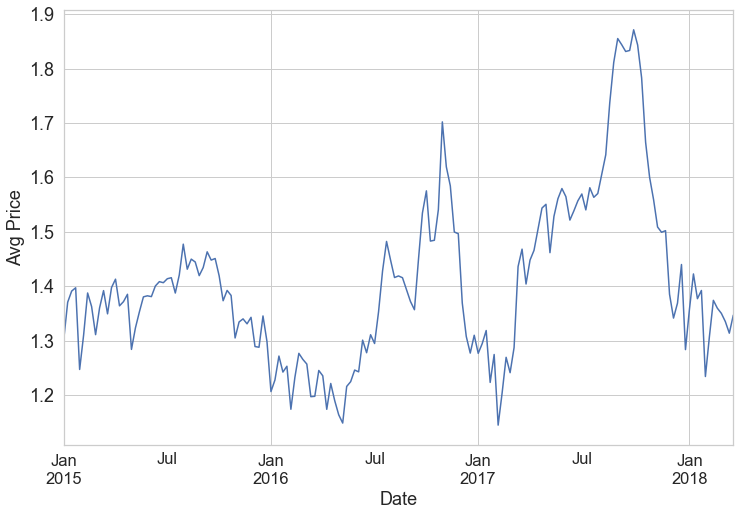

In [91]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['Average Price'].plot()
plt.ylabel('Avg Price')

In [92]:
dftemp=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv",index_col=0)

<AxesSubplot:xlabel='AveragePrice'>

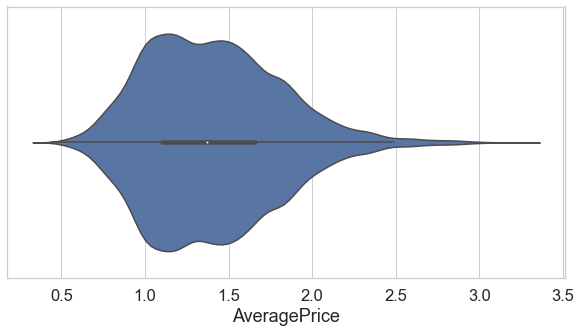

In [93]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.violinplot(dftemp.dropna(subset = ['AveragePrice']).AveragePrice)

<AxesSubplot:xlabel='AveragePrice'>

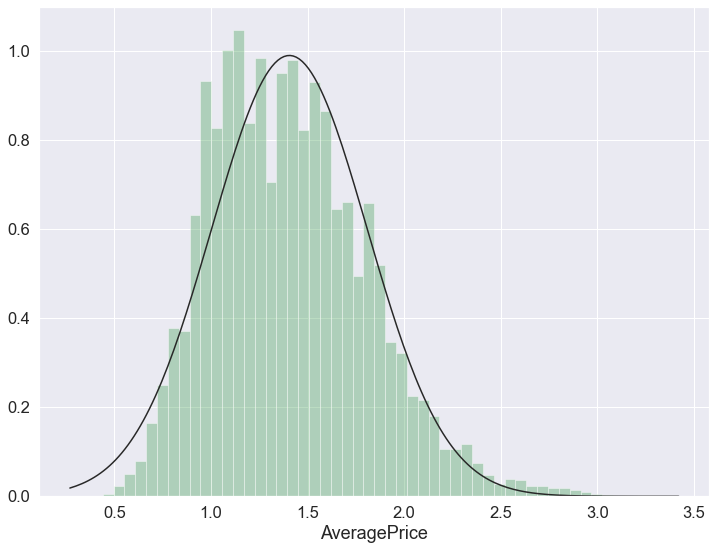

In [94]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(12, 9))
sns.distplot(a=dftemp.AveragePrice, kde=False, fit=norm,color="g")

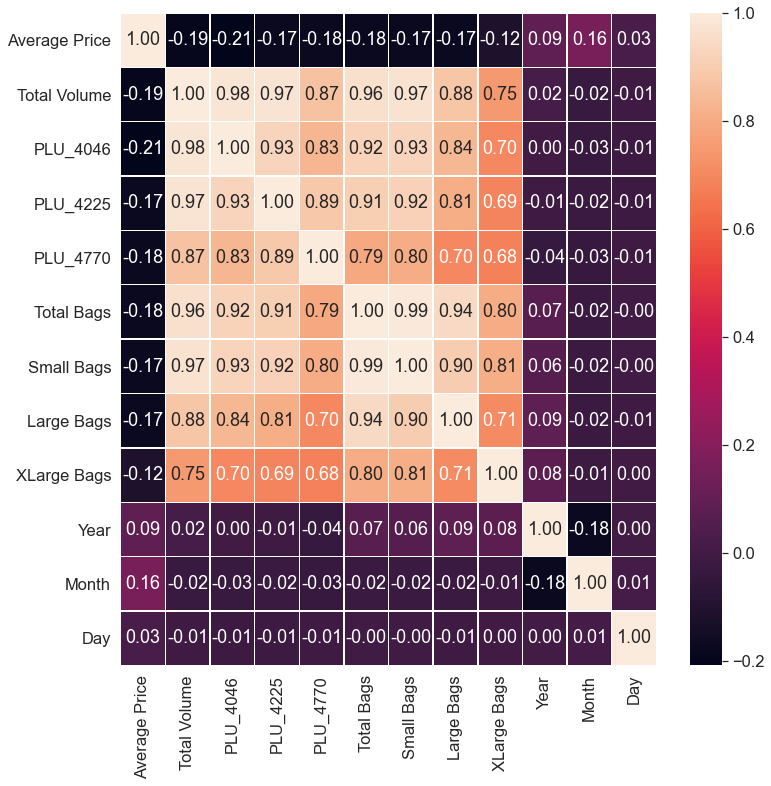

In [95]:
f,axis = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linewidths=.4, fmt= '.2f',ax=axis)
plt.show()

<AxesSubplot:xlabel='Region'>

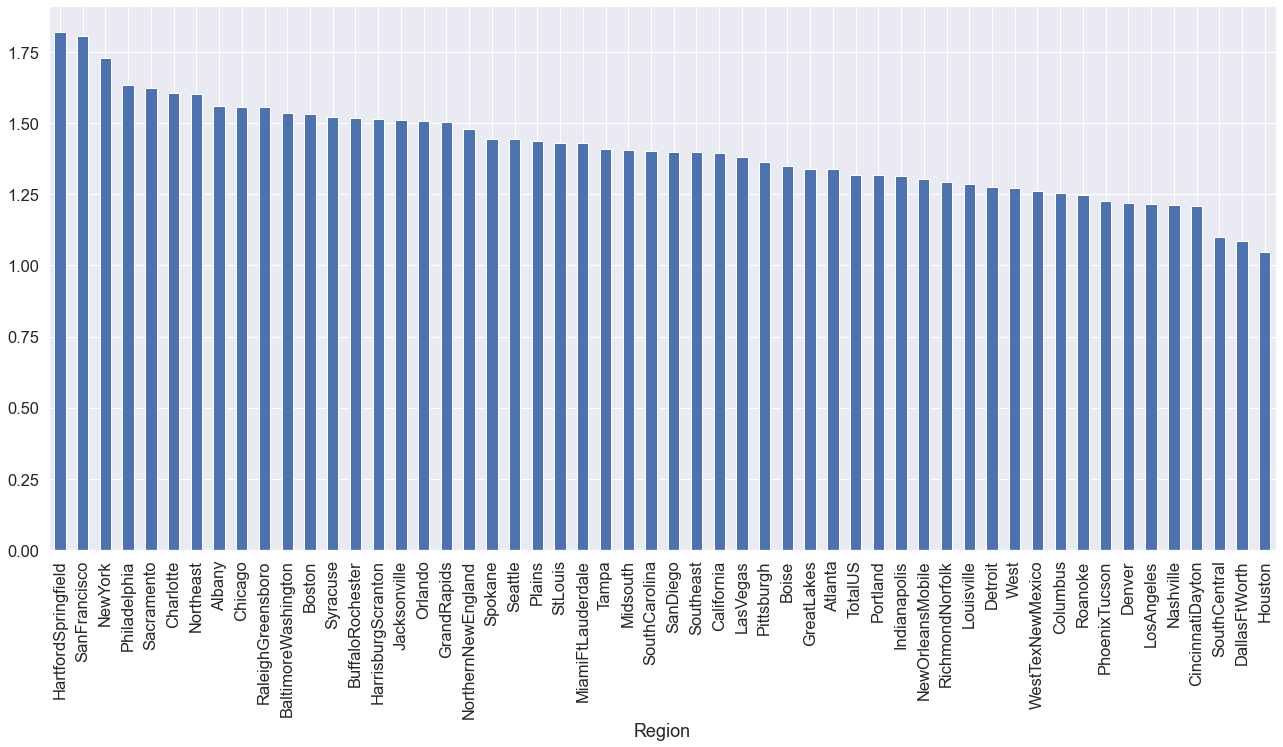

In [96]:
plt.figure(figsize=(22,10))
df.groupby("Region").mean()['Average Price'].sort_values(ascending=False).plot(kind='bar')

# Looks like below 5 region are having highest Avacado consumption:

1) West
2) California
3) SouthCentral
4) Northeast
5) Southeast

Text(0.5, 1.0, 'Average of Total Volume According to Region')

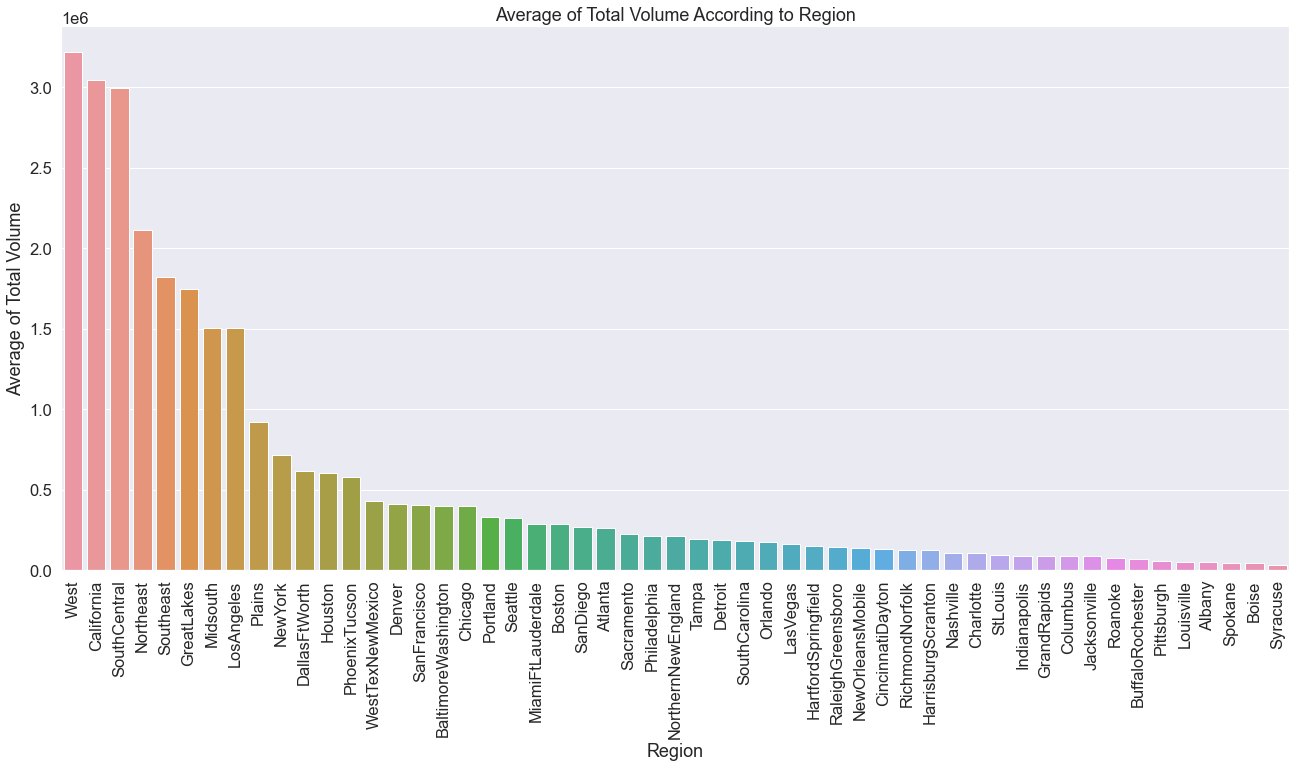

In [97]:
filter1=df.Region!='TotalUS'
df1=df[filter1]

region_list=list(df1.Region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.Region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

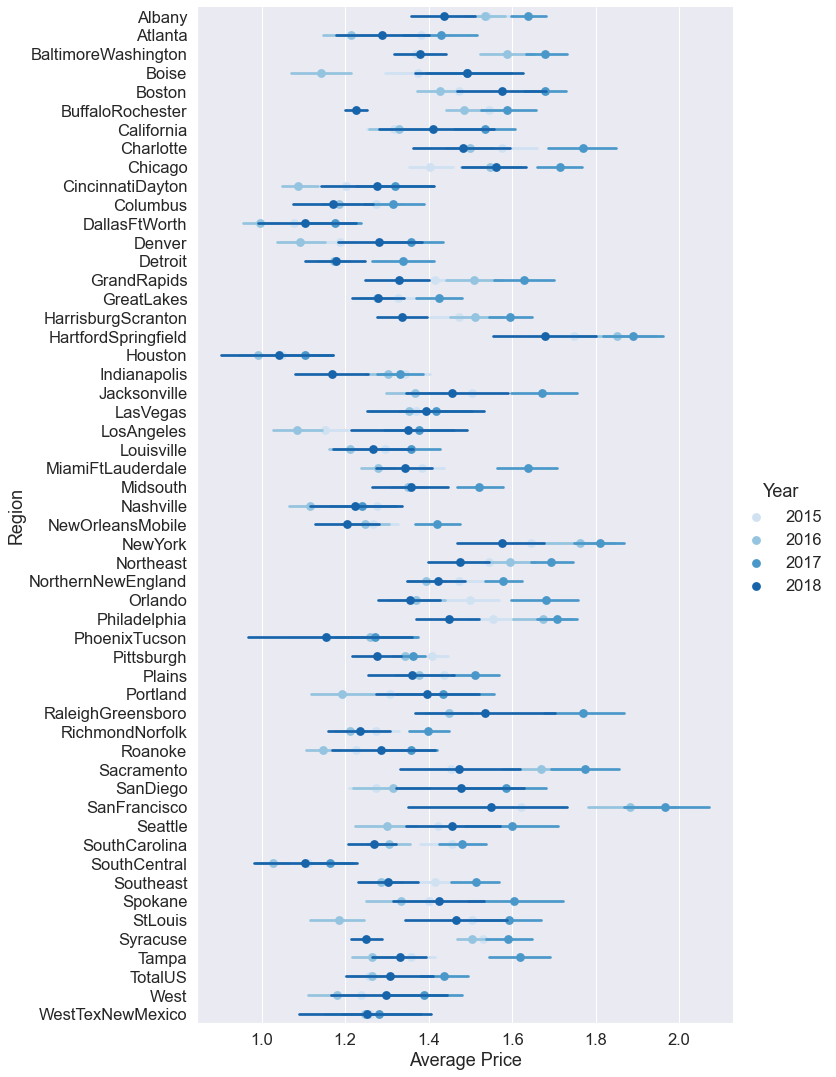

In [98]:
g = sns.factorplot('Average Price','Region',data=df,
                   hue='Year',
                   height=15,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

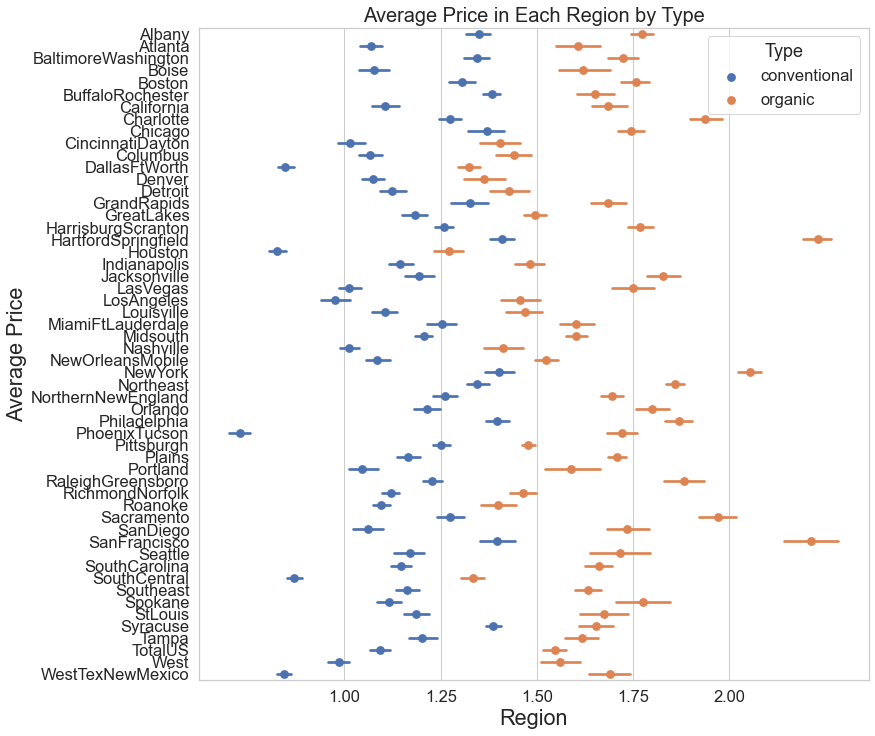

In [99]:
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.pointplot(x='Average Price',y='Region',data=df, hue='Type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Average Price',{'fontsize':'large'})
plt.title("Average Price in Each Region by Type",{'fontsize':20})
plt.rc('ytick', labelsize=18) 

<AxesSubplot:xlabel='Type'>

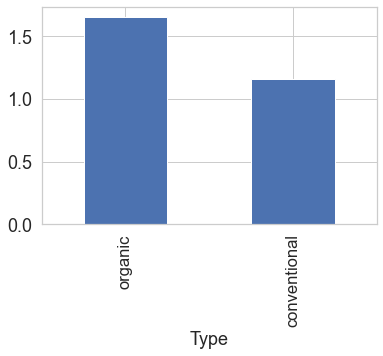

In [100]:
df.groupby("Type").mean()['Average Price'].sort_values(ascending=False).plot(kind='bar')

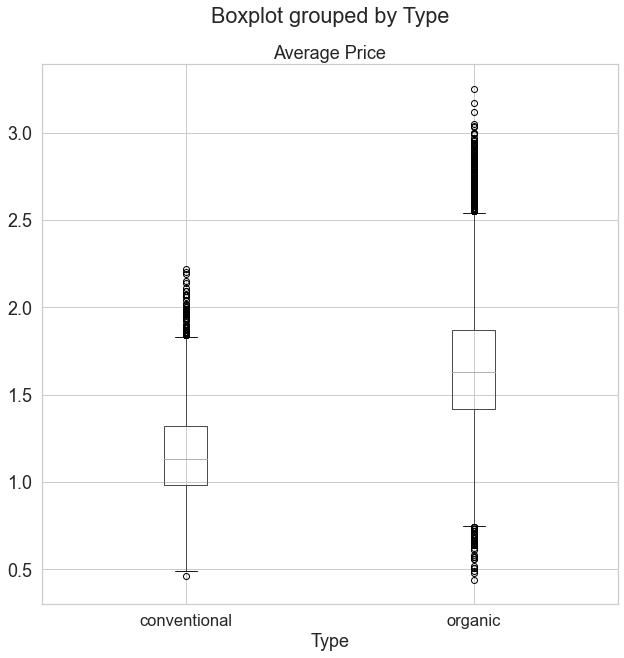

In [101]:
df.boxplot(column = 'Average Price', by = 'Type', figsize = (10,10))
plt.show()

In [102]:
PLU_df=df[['PLU_4046','PLU_4225','PLU_4770']]

In [103]:
PLU_df.shape

(18249, 3)

In [104]:
PLU_df.head()

,PLU_4046,PLU_4225,PLU_4770
0,1036.74,54454.85,48.16
1,674.28,44638.81,58.33
2,794.70,109149.67,130.50
3,1132.00,71976.41,72.58
4,941.48,43838.39,75.78


In [105]:
print("Total number of avocados with PLU 4046 sold: ",PLU_df['PLU_4046'].sum())
print("Total number of avocados with PLU 4225 sold: ",PLU_df['PLU_4225'].sum())
print("Total number of avocados with PLU 4770 sold: ",PLU_df['PLU_4770'].sum())

Total number of avocados with PLU 4046 sold:  5347110739.26
Total number of avocados with PLU 4225 sold:  5386275717.93
Total number of avocados with PLU 4770 sold:  416802342.12999994


<AxesSubplot:>

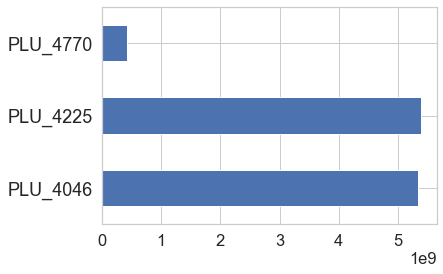

In [106]:
PLU_df.sum().plot(kind='barh')

In [107]:
Type=df.groupby('Type')['Total Volume'].agg('sum')

values=[Type['conventional'],Type['organic']]
labels=['conventional','organic']

trace=go.Pie(labels=labels,values=values)
py.iplot([trace])

Text(0.5, 1.0, 'Average Price by Day')

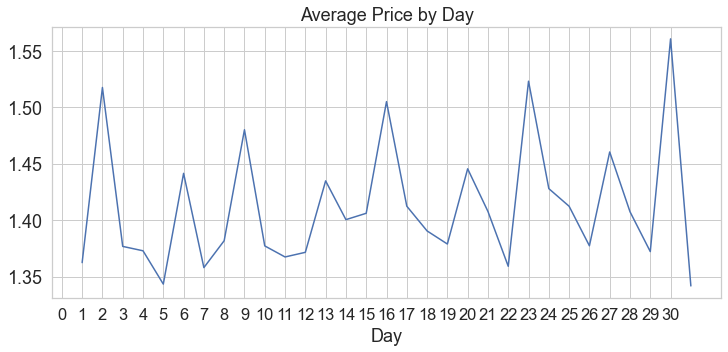

In [109]:
dategroup=df.groupby('Day').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0,31)) # Manually set x-ticks
dategroup['Average Price'].plot(x=df.Day)
plt.title('Average Price by Day')

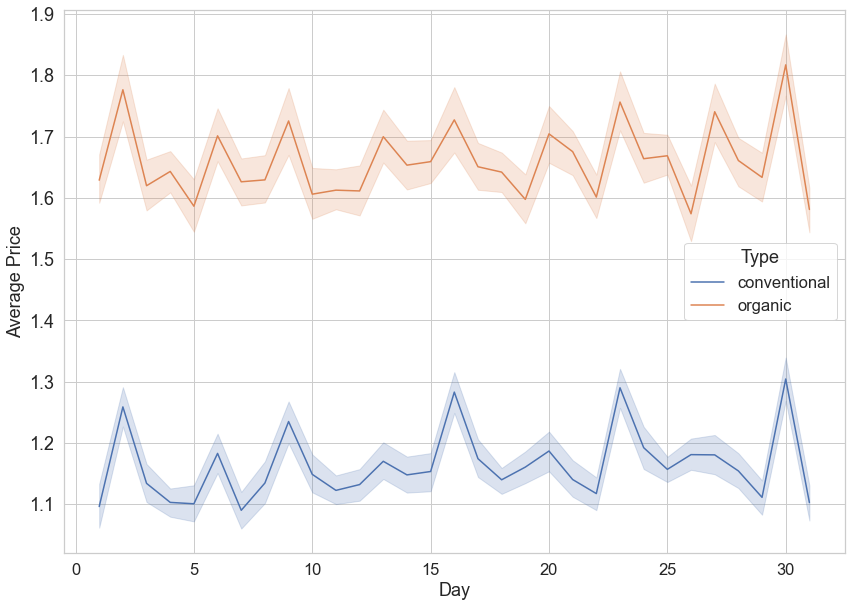

In [110]:
plt.figure(figsize=(14,10))
sns.lineplot(x="Day", y="Average Price", hue='Type', data=df)
plt.show()

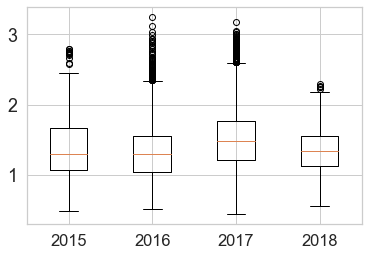

In [111]:
datayear = []
for i in dftemp.year.unique():
    datayear.append(dftemp[dftemp.year == i].AveragePrice)
plt.boxplot(datayear)
plt.xticks(range(1,dftemp.year.nunique()+1),dftemp.year.unique())
plt.show()

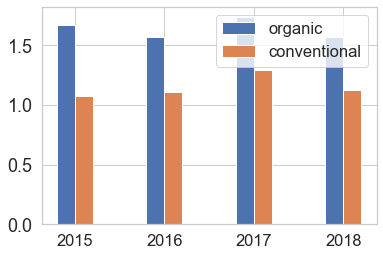

In [112]:
datayearorganic = []
datayearconventional = []
for i in dftemp.year.unique():
    datayearorganic.append(dftemp[(dftemp.year == i) & (dftemp['type'] == 'organic')].AveragePrice.mean())
    datayearconventional.append(dftemp[(dftemp.year == i) & (dftemp.type == 'conventional')].AveragePrice.mean())
bar_width = 0.20
plt.bar(np.arange(dftemp.year.nunique()),datayearorganic,bar_width, label = 'organic')
plt.bar(np.arange(dftemp.year.nunique())+bar_width,datayearconventional,bar_width, label = 'conventional')
plt.xticks(np.arange(dftemp.year.nunique())+bar_width/2,dftemp.year.unique())
plt.legend()
plt.rcParams["figure.figsize"] = (15, 16)
plt.show()

# EDA Conclusions
Every year, prices of avacados are higher in Second half of year, particularly in the September-October month.Prices are increasing year by year.
Most of the Avacados are in the price range 1.0 to 1.5.
Hart Ford Springfield has highest average price in year 2017. Also, in San Franciso, there was a high rise in prices in year 2016-2017.
Organic Avacados are costlier as compared to Conventional ones. But Conventional ones are high in demand may be due to low prices.
Sales of Avacados with Price Look up code of 4225 are higher.

In [113]:
df['Region'].nunique()

54

In [114]:
df['Type'].nunique()

2

In [115]:
df_final=pd.get_dummies(df.drop(['Region'],axis=1),drop_first=True)

In [116]:
df_final.head()

,Date,Average Price,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Month,Day,Type_organic
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


In [118]:
X = df_final[ ['Total Volume', 'PLU_4046', 'PLU_4225','PLU_4770','Total Bags','Small Bags','Large Bags','XLarge Bags','Year','Month','Day','Type_organic'] ]
y = df_final['Average Price']

In [119]:
print(X.shape)
print(y.shape)

(18249, 12)
(18249,)


In [120]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['Total Volume', 'PLU_4046', 'PLU_4225','PLU_4770','Total Bags','Small Bags','Large Bags','XLarge Bags','Year','Month','Day','Type_organic']] = scaler.fit_transform(X_train)
X_test[['Total Volume', 'PLU_4046', 'PLU_4225','PLU_4770','Total Bags','Small Bags','Large Bags','XLarge Bags','Year','Month','Day','Type_organic']] = scaler.transform(X_test)

In [122]:
X_train.head()

,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Month,Day,Type_organic
2,-0.245397,-0.230237,-0.243326,-0.214369,-0.242629,-0.245094,-0.217488,-0.177445,0.900933,1.652543,0.149782,1.007080
13,-0.139340,-0.152215,-0.156342,-0.078814,-0.091821,-0.118423,0.001000,-0.136441,0.900933,1.088244,-1.679108,-0.992969
22,-0.242160,-0.221052,-0.243506,-0.214369,-0.242930,-0.244181,-0.221485,-0.177445,-1.218764,0.241795,1.178532,1.007080
25,-0.083880,-0.101570,0.011944,-0.050273,-0.173775,-0.152821,-0.221485,-0.177445,-1.218764,0.241795,-1.221885,-0.992969
2,-0.243386,-0.228410,-0.240804,-0.214369,-0.241026,-0.241671,-0.221471,-0.177445,1.960781,-0.886802,-0.536052,1.007080


In [123]:
X_train.describe()

,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Month,Day,Type_organic
count,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04
mean,-2.690574e-17,5.475447e-18,-3.837376e-17,-2.209343e-16,1.470766e-17,2.250257e-17,9.566824e-18,-7.243561e-18,-8.726680e-14,2.394368e-17,2.566996e-17,9.195634e-16
std,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00
min,-2.459011e-01,-2.302600e-01,-2.437891e-01,-2.143689e-01,-2.438958e-01,-2.454578e-01,-2.214855e-01,-1.774450e-01,-1.218764e+00,-1.451101e+00,-1.679108e+00,-9.929694e-01
25%,-2.426549e-01,-2.295617e-01,-2.411954e-01,-2.143689e-01,-2.384653e-01,-2.414405e-01,-2.209130e-01,-1.774450e-01,-1.218764e+00,-8.868024e-01,-8.789686e-01,-9.929694e-01
50%,-2.132846e-01,-2.231798e-01,-2.188480e-01,-2.125501e-01,-2.013712e-01,-2.083244e-01,-2.100872e-01,-1.774450e-01,-1.589155e-01,-4.035400e-02,3.547632e-02,-9.929694e-01
75%,-1.177301e-01,-1.403268e-01,-1.178734e-01,-1.551716e-01,-1.269891e-01,-1.297235e-01,-1.280201e-01,-1.694710e-01,9.009328e-01,8.060944e-01,8.356156e-01,1.007080e+00
max,1.814294e+01,1.792432e+01,1.691323e+01,2.417639e+01,1.993055e+01,1.816825e+01,2.378867e+01,2.640314e+01,1.960781e+00,1.652543e+00,1.750061e+00,1.007080e+00


In [124]:
X_test.head()

,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Month,Day,Type_organic
3,-0.244631,-0.229176,-0.242334,-0.214369,-0.242536,-0.245279,-0.216549,-0.177445,-1.218764,1.652543,-1.107580,1.007080
25,-0.189818,-0.226356,-0.143668,-0.085100,-0.188836,-0.203317,-0.133165,-0.107003,-1.218764,0.241795,-1.221885,-0.992969
40,0.061641,-0.146391,0.051818,-0.124087,0.358279,0.102441,1.144522,-0.177445,-0.158916,-0.886802,0.492699,1.007080
16,-0.243018,-0.230010,-0.240243,-0.214369,-0.238336,-0.242477,-0.208167,-0.177445,0.900933,0.806094,-0.650357,1.007080
10,-0.241159,-0.229041,-0.241291,-0.207405,-0.232473,-0.230435,-0.221276,-0.177445,1.960781,-1.451101,-0.193135,1.007080


In [125]:
y_train.head()

2     1.79
13    1.84
22    1.14
25    1.26
2     1.90
Name: Average Price, dtype: float64

In [126]:
y_test.head()

3     1.48
25    1.05
40    1.27
16    2.15
10    1.93
Name: Average Price, dtype: float64

# Linear Regression Model

In [127]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
lnr.fit(X_train,y_train)

LinearRegression()

In [128]:
print('Intercept:',lnr.intercept_)                                            
print('Coefficients:',lnr.coef_)

Intercept: 1.4034646208639432
Coefficients: [-2.71126273e+02  9.98195804e+01  9.53001385e+01  8.28660129e+00
 -1.78293395e+04  1.35538500e+04  4.44147397e+03  3.18752820e+02
  4.89904800e-02  7.16219018e-02  1.07609199e-02  2.44406632e-01]


In [129]:
y_pred_train_lnr =lnr.predict(X_train)
print(y_pred_train_lnr)
y_pred_test_lnr =lnr.predict(X_test)
print(y_pred_test_lnr)

[1.81715293 1.25926027 1.62250116 ... 1.51241247 1.68283482 1.01860639]
[1.69975483 1.11489402 1.56178923 ... 1.28535622 1.71614436 1.59595346]


# Model Evaluation for linear regression model
Mean Absolute Error , Mean Squared Error and Root Mean Squared Error metrics

In [130]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test_lnr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_lnr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_lnr)))

MAE: 0.23178628038488416
MSE: 0.09004835625342257
RMSE: 0.3000805829330225


# Linear Model Conclusion:

The RMSE is low so we can say that we do have a good model, but lets check to be more sure. Lets plot the y_test vs the predictions


R- Square metric

In [131]:
from sklearn.metrics import r2_score
R2_train_lnr = r2_score(y_train, y_pred_train_lnr) 
R2_test_lnr = r2_score(y_test, y_pred_test_lnr)

In [132]:
print('R2 for training set is {}'.format(R2_train_lnr))
print('R2 for test set is {}'.format(R2_test_lnr))

R2 for training set is 0.4366859832740704
R2 for test set is 0.44717136620968234


,Y Test,Pred
3,1.48,1.699755
25,1.05,1.114894
40,1.27,1.561789
16,2.15,1.747950
10,1.93,1.643242


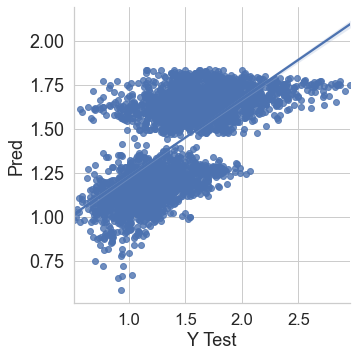

In [133]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_test_lnr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

As we can see that we dont have a straight line so I am not sure that this is the best model we can apply on our data

Adjusted R-Square Metric
Let us develop a Function to calculate the Adjusted R square so that we can call the function anytime during the program

def Adjusted_r2(r_square,P,N)

return(1-(((1-r_square)*(N-1))/(N-P-1))) Were r_square is the R-Square value P is the number of independent variables. In this case it is 12. N is the length of the dependent variables.

In [134]:
def Adjusted_r2(r_square,N): #creating function so that we can call the function again and again
    return(1-(((1-r_square)*(N-1))/(N-13)))

In [135]:
adj_r2_train=Adjusted_r2(R2_train_lnr,len(X_train))
print('The Adjusted R-square of Linear Regression Train Dataset is :', adj_r2_train)
adj_r2_test=Adjusted_r2(R2_test_lnr,len(X_test))
print('The Adjusted R-square of Linear Regression Test Dataset is :', adj_r2_test)

The Adjusted R-square of Linear Regression Train Dataset is : 0.4362225410554559
The Adjusted R-square of Linear Regression Test Dataset is : 0.44534735092084987


# Decision Tree


Decision Tree Model 1

In [136]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

Created object 'dtr' of DecisionTreeRegressor and fitting it into our train dataset.

In [137]:
y_pred_train_dtr=dtr.predict(X_train)
y_pred_test_dtr=dtr.predict(X_test)

,Y Test,Pred
3,1.48,1.57
25,1.05,1.07
40,1.27,1.37
16,2.15,2.20
10,1.93,1.62


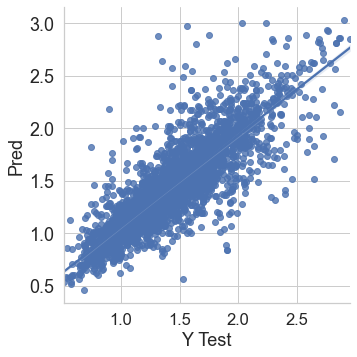

In [138]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_test_dtr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

Nice, here we can see that we nearly have a straigt line, in other words its better than the Linear regression model, and to be more sure lets check the RMSE

# Model Evaluation for Decision Tree Model - 1

Mean Absolute Error , Mean Squared Error and Root Mean Squared Error metrics

In [139]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test_dtr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_dtr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_dtr)))

MAE: 0.13764931506849315
MSE: 0.04585616438356164
RMSE: 0.21414052485123322


Very Nice, our RMSE is lower than the previous one we got with Linear Regression. ok now I am going to try one last model to see if I can improve my predictions for this data which is the RandomForestRegressor

# R- Square metric

In [140]:
from sklearn.metrics import r2_score
R2_train_dtr = r2_score(y_train, y_pred_train_dtr)
print('R2 for training set is {}'.format(R2_train_dtr))
R2_test_dtr = r2_score(y_test, y_pred_test_dtr)
print('R2 for test set is {}'.format(R2_test_dtr))

R2 for training set is 1.0
R2 for test set is 0.7184779182899846


# Adjusted R-Square Metric

In [141]:
adj_r2_train=Adjusted_r2(R2_train_dtr,len(X_train))
print('The Adjusted R-square of Linear Regression Train Dataset is :', adj_r2_train)
adj_r2_test=Adjusted_r2(R2_test_dtr,len(X_test))
print('The Adjusted R-square of Linear Regression Test Dataset is :', adj_r2_test)

The Adjusted R-square of Linear Regression Train Dataset is : 1.0
The Adjusted R-square of Linear Regression Test Dataset is : 0.7175490579708974


# Decision Tree Model 2

In [142]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='mse', max_depth=7,
                               max_features=None, max_leaf_nodes=None,
                               min_impurity_decrease=0.0, min_impurity_split=None,
                               min_samples_leaf=1, min_samples_split=2,
                               min_weight_fraction_leaf=0.0, presort=False,
                               random_state=None, splitter='best')
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7, presort=False)

Created object 'dtr' of DecisionTreeRegressor using hyperparameters and fitting it into our train dataset.

In [143]:
y_pred_train_dtr=dtr.predict(X_train)
y_pred_test_dtr=dtr.predict(X_test)

,Y Test,Pred
3,1.48,1.670239
25,1.05,1.122042
40,1.27,1.347820
16,2.15,1.875942
10,1.93,1.718567


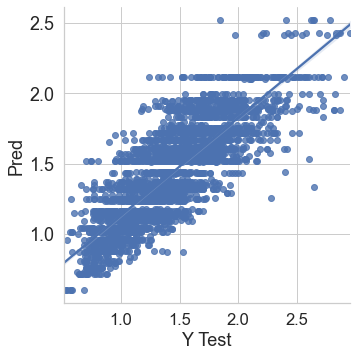

In [144]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_test_dtr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# Model Evaluation for Decision Tree Model - 2

Mean Absolute Error , Mean Squared Error and Root Mean Squared Error metrics

In [146]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test_dtr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_dtr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_dtr)))

MAE: 0.1741984426029892
MSE: 0.05288884870689614
RMSE: 0.22997575678078797


# R- Square metric

In [147]:
from sklearn.metrics import r2_score
R2_train_dtr = r2_score(y_train, y_pred_train_dtr)
print('R2 for training set is {}'.format(R2_train_dtr))
R2_test_dtr = r2_score(y_test, y_pred_test_dtr)
print('R2 for test set is {}'.format(R2_test_dtr))

R2 for training set is 0.7069447900776252
R2 for test set is 0.6753025686433349


# Adjusted R-Square Metric

In [148]:
adj_r2_train=Adjusted_r2(R2_train_dtr,len(X_train))
print('The Adjusted R-square of Linear Regression Train Dataset is :', adj_r2_train)
adj_r2_test=Adjusted_r2(R2_test_dtr,len(X_test))
print('The Adjusted R-square of Linear Regression Test Dataset is :', adj_r2_test)

The Adjusted R-square of Linear Regression Train Dataset is : 0.7067036915914695
The Adjusted R-square of Linear Regression Test Dataset is : 0.6742312545998155


# Random Forest Model

Random Forest Model 1

In [149]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor(random_state = 0)
rdr.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [150]:
y_pred_train_rdr=rdr.predict(X_train)
y_pred_test_rdr=rdr.predict(X_test)

# Model Evaluation for Random Forest Model - 1

Mean Absolute Error , Mean Squared Error and Root Mean Squared Error metrics

In [151]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test_rdr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_rdr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_rdr)))

MAE: 0.10275402739726025
MSE: 0.021886026657534238
RMSE: 0.14793926678719965


Well as we can see the RMSE is lower than the two previous models, so the RandomForest Regressor is the best model in this case.

,Y Test,Pred
3,1.48,1.6167
25,1.05,1.0543
40,1.27,1.3214
16,2.15,2.0400
10,1.93,1.6290


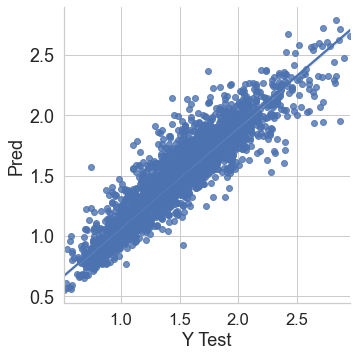

In [152]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_test_rdr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

R- Square metric

In [153]:
R2_train_rdr = r2_score(y_train, y_pred_train_rdr)
R2_test_rdr = r2_score(y_test, y_pred_test_rdr)

In [154]:
print('R2 for training set is {}'.format(R2_train_rdr))
print('R2 for test set is {}'.format(R2_test_rdr))

R2 for training set is 0.9820358111796509
R2 for test set is 0.8656363900510038


Adjusted R-Square Metric

In [155]:
adj_r2_train=Adjusted_r2(R2_train_rdr,len(X_train))
print('The Adjusted R-square of Linear Regression Train Dataset is :', adj_r2_train)
adj_r2_test=Adjusted_r2(R2_test_rdr,len(X_test))
print('The Adjusted R-square of Linear Regression Test Dataset is :', adj_r2_test)

The Adjusted R-square of Linear Regression Train Dataset is : 0.9820210319210574
The Adjusted R-square of Linear Regression Test Dataset is : 0.86519306771958


# Random Forest Model 2

In [156]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor(random_state = 0,
                                n_estimators = 15,
                                min_samples_split = 2,
                                min_samples_leaf = 1)
rdr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=15, random_state=0)

In [158]:
y_pred_train_rdr=rdr.predict(X_train)
y_pred_test_rdr=rdr.predict(X_test)

# Model Evaluation for Random Forest Model - 2


Mean Absolute Error , Mean Squared Error and Root Mean Squared Error metrics

In [159]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test_rdr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_rdr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_rdr)))

MAE: 0.1082889497716895
MSE: 0.024083383378995432
RMSE: 0.15518821920170175


,Y Test,Pred
3,1.48,1.626667
25,1.05,1.057333
40,1.27,1.316667
16,2.15,2.099333
10,1.93,1.618667


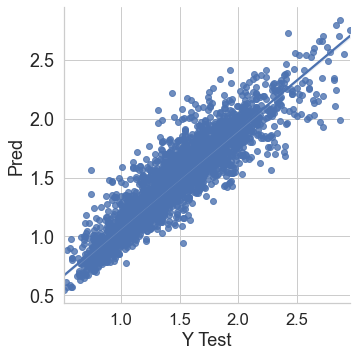

In [160]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_test_rdr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# R- Square metric

In [161]:
R2_train_rdr = r2_score(y_train, y_pred_train_rdr)
R2_test_rdr = r2_score(y_test, y_pred_test_rdr)

In [162]:
print('R2 for training set is {}'.format(R2_train_rdr))
print('R2 for test set is {}'.format(R2_test_rdr))

R2 for training set is 0.9760870832789255
R2 for test set is 0.8521462857912806


# Adjusted R-Square Metric

In [163]:
adj_r2_train=Adjusted_r2(R2_train_rdr,len(X_train))
print('The Adjusted R-square of Linear Regression Train Dataset is :', adj_r2_train)
adj_r2_test=Adjusted_r2(R2_test_rdr,len(X_test))
print('The Adjusted R-square of Linear Regression Test Dataset is :', adj_r2_test)

The Adjusted R-square of Linear Regression Train Dataset is : 0.9760674099620015
The Adjusted R-square of Linear Regression Test Dataset is : 0.851658453904972


# Model Evaluation Results